# Exercise 6.2: Exploring Relationships

## <font color='blue'> Author Angela North</font>

# Step 1: Set Up Jupyter Notebook and Import Data

In [1]:
import pandas as pd
import numpy as np
import numbers
import chart_studio
import plotly
from plotly.offline import init_notebook_mode, iplot
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly import tools
import folium 
import seaborn as sns
import matplotlib.pyplot as plt
# from folium import plugins

init_notebook_mode(connected=True)

# Load the cleaned dataset

In [2]:
# Load the cleaned dataset
gun_violence_df = pd.read_csv('gun-violence-data_01-2013_03-2018.csv')

# Step 2: Select Variables for Exploratory Visual Analysis

In [3]:
# Step 2: Select Variables for Exploratory Visual Analysis
# Exclude 'ID', 'date', and 'index' columns
variables_for_analysis = gun_violence_df.columns.difference(['ID', 'date', 'index'])

# Step 3: Create Correlation Matrix Heatmap

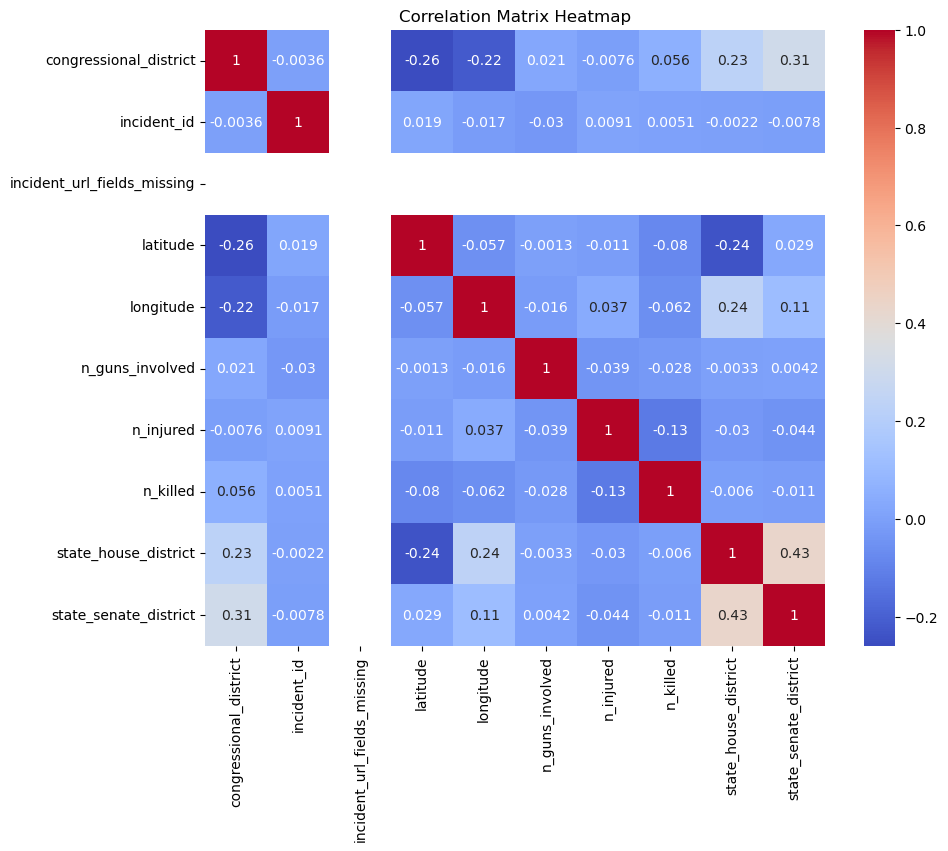

In [4]:
# Create Correlation Matrix Heatmap
correlation_matrix = gun_violence_df[variables_for_analysis].corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()


# Step 4: Create Scatterplots for Strongest Correlations

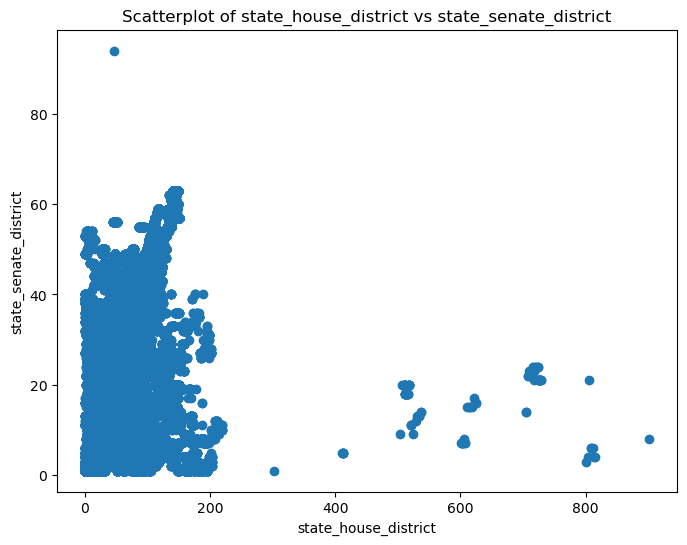

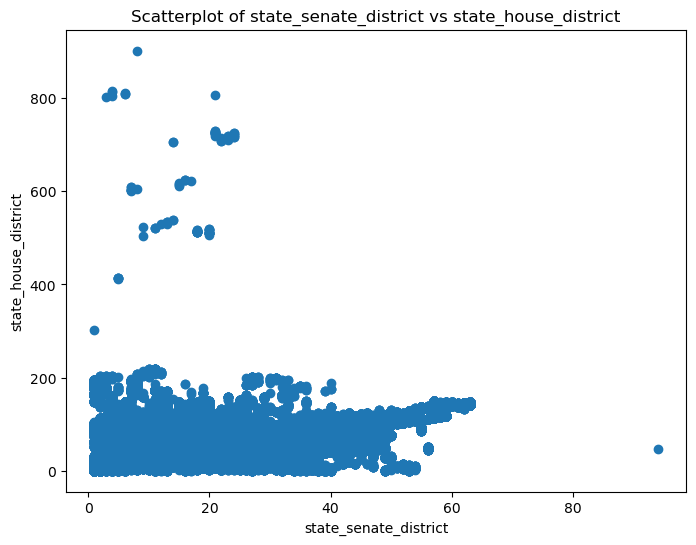

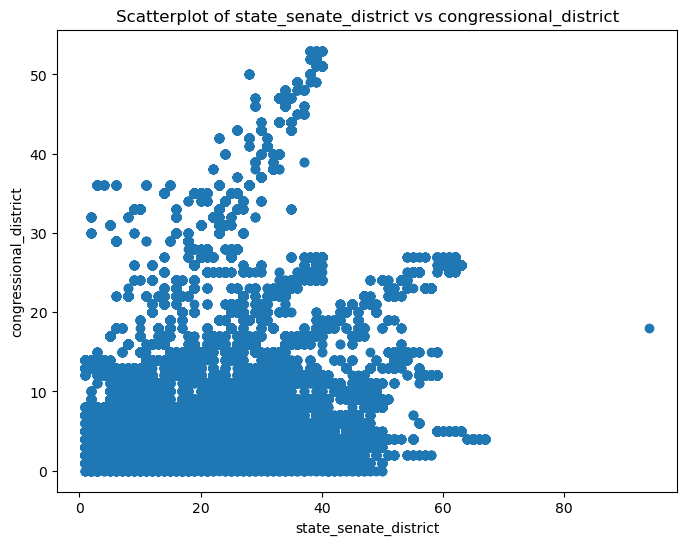

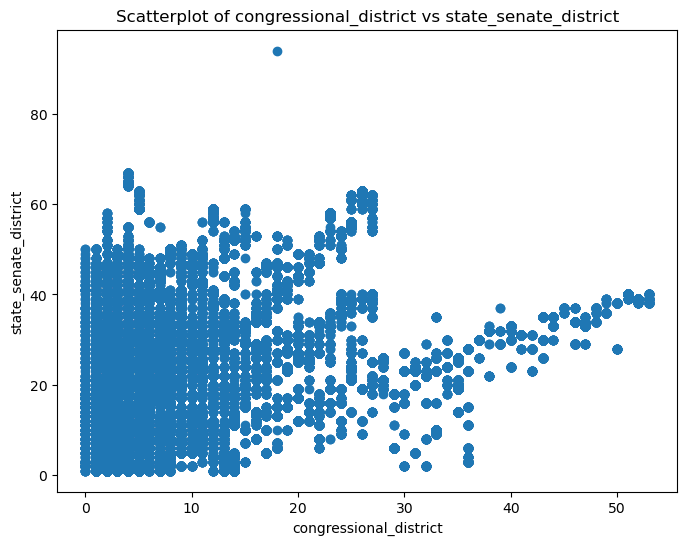

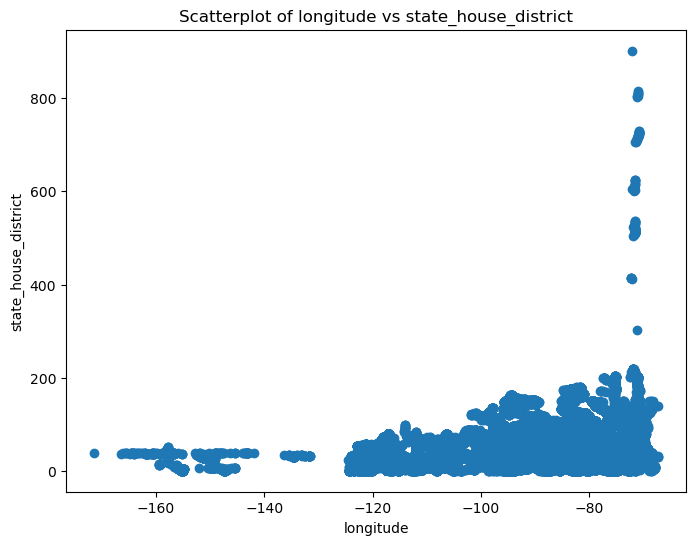

In [5]:
# Create Scatterplots for Strongest Correlations
strongest_correlations = correlation_matrix.unstack().sort_values(ascending=False)
strongest_correlations = strongest_correlations[strongest_correlations < 1]  # Exclude self-correlation

# Select the top correlated pairs (you can adjust the number)
top_correlations = strongest_correlations[:5]

# Create scatterplots for the top correlated pairs
for var1, var2 in top_correlations.index:
    plt.figure(figsize=(8, 6))
    plt.scatter(gun_violence_df[var1], gun_violence_df[var2])
    plt.xlabel(var1)
    plt.ylabel(var2)
    plt.title(f'Scatterplot of {var1} vs {var2}')
    plt.show()

# Step 5: Create Pair Plot of the Entire Data Set

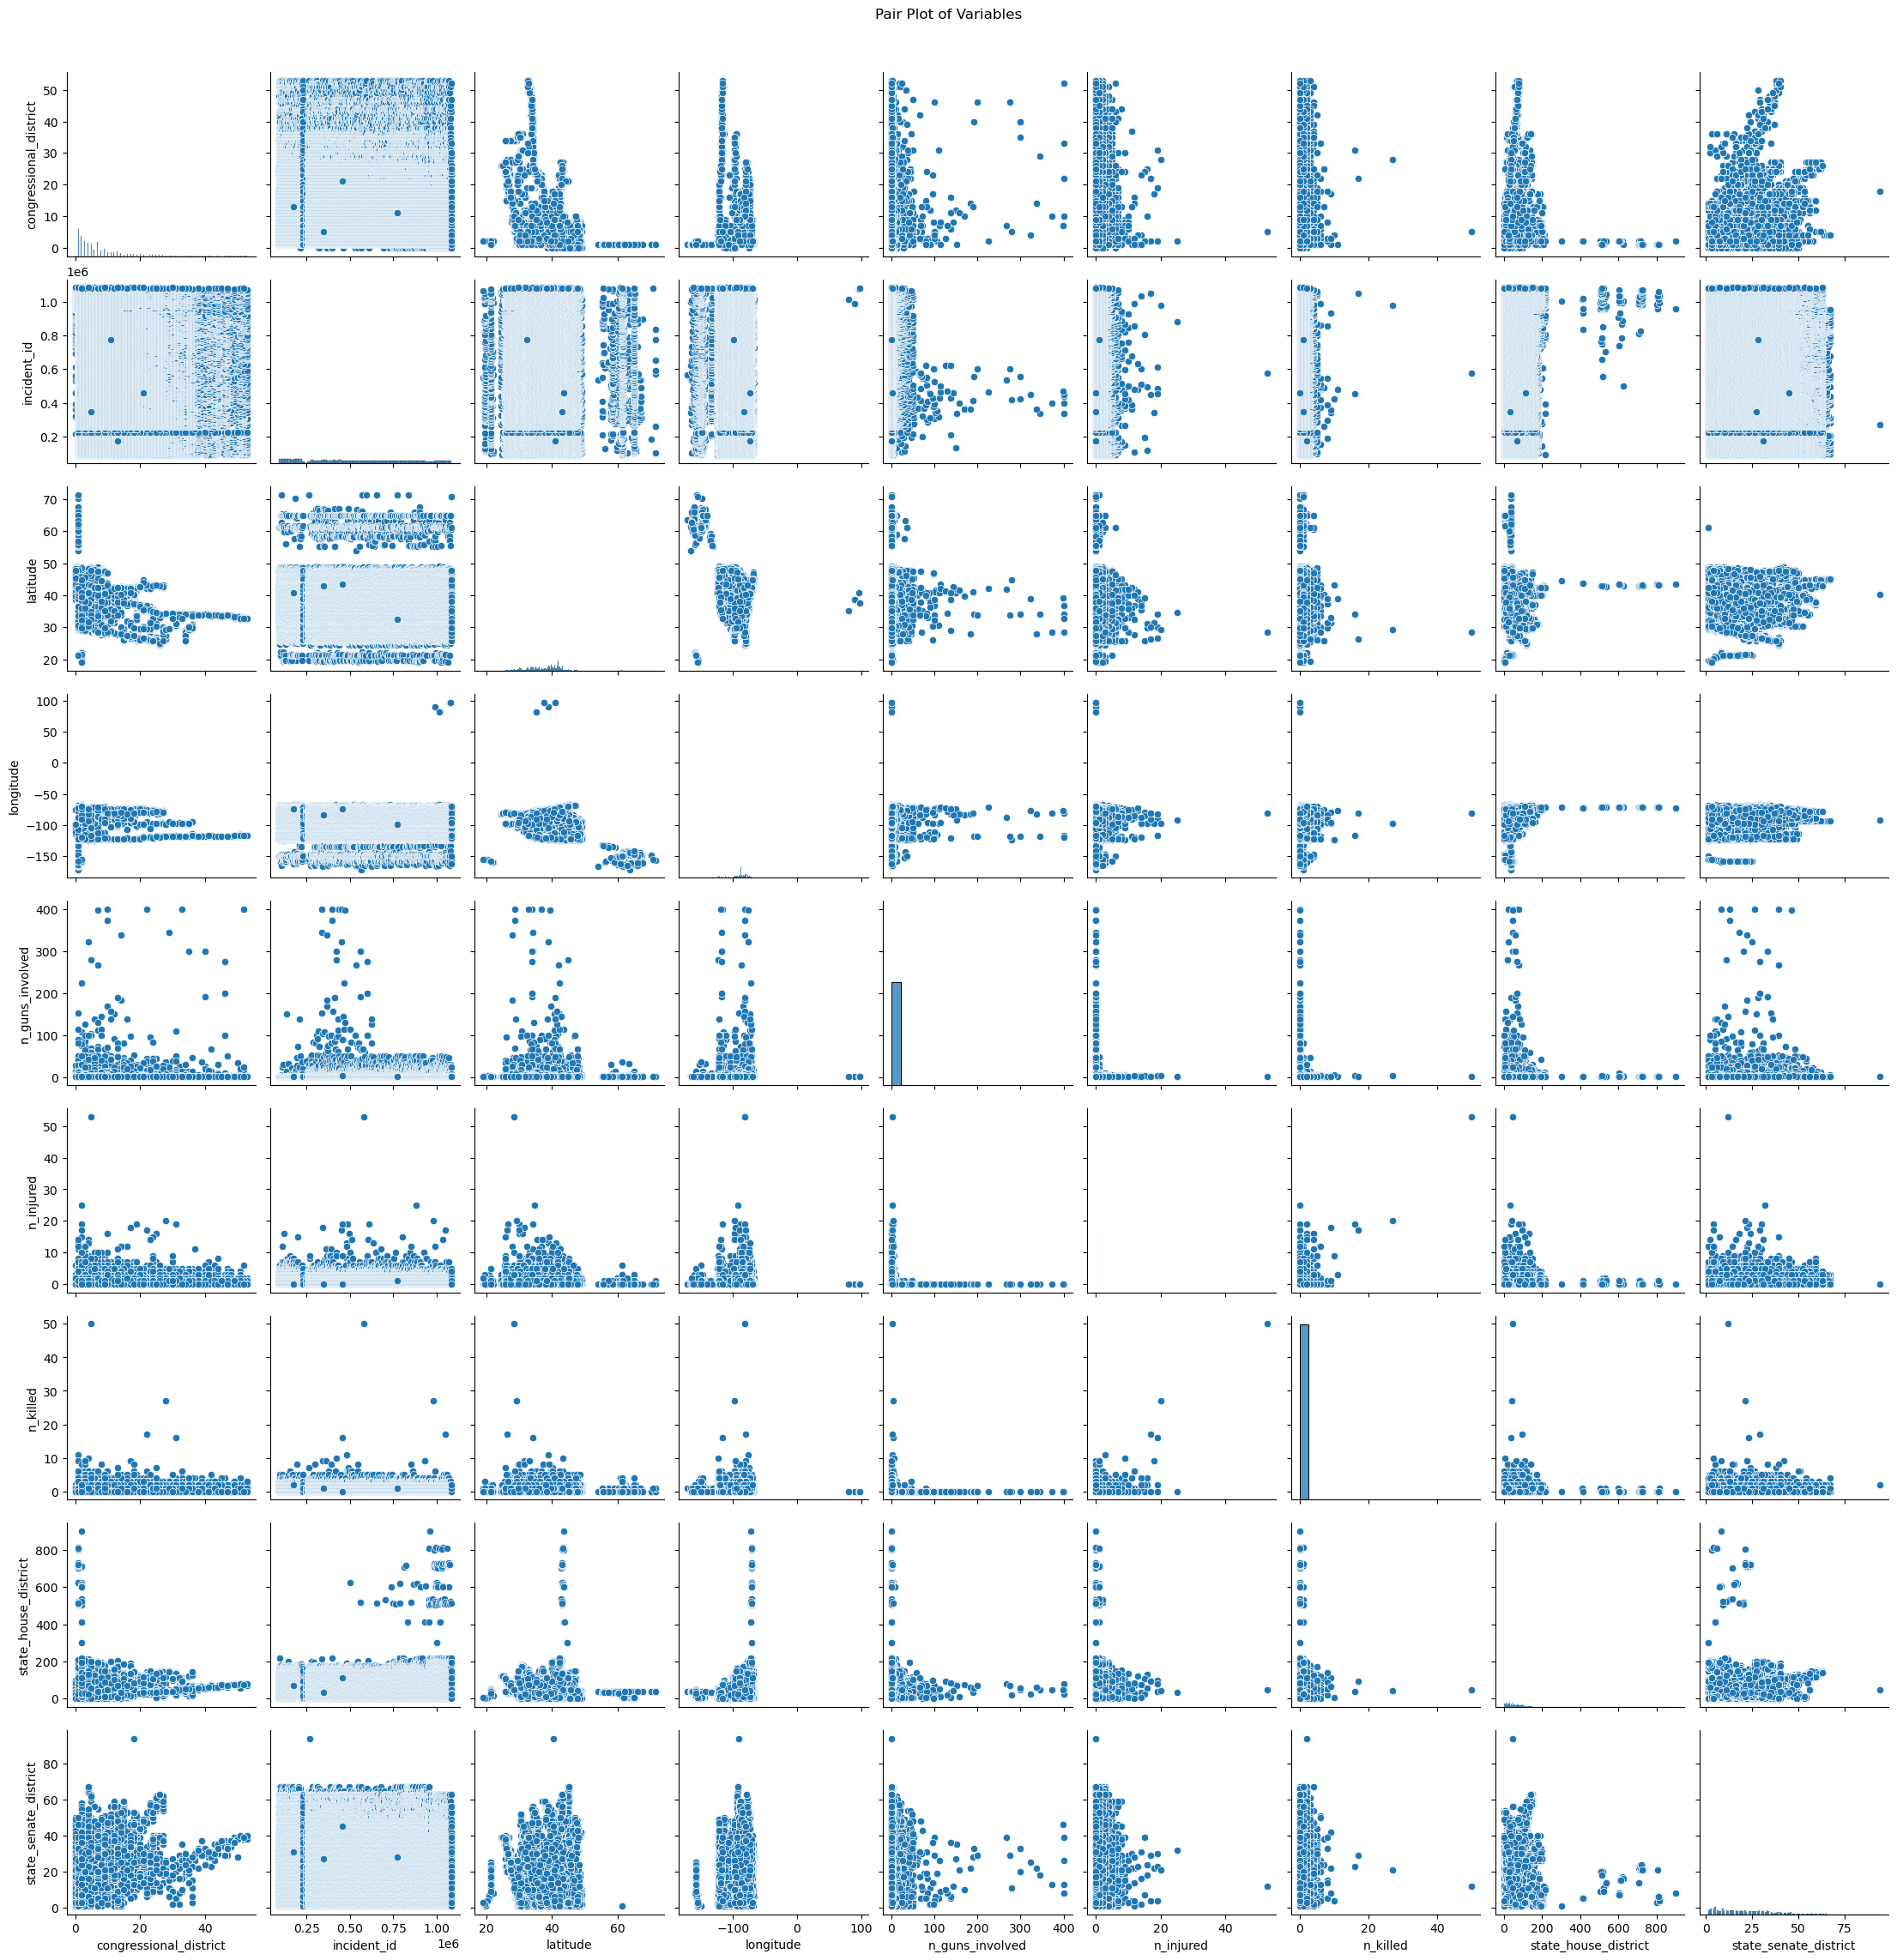

In [6]:
# Convert boolean columns to numeric (0 or 1)
boolean_columns = gun_violence_df.select_dtypes(include=['bool']).columns
gun_violence_df[boolean_columns] = gun_violence_df[boolean_columns].astype(int)

# Exclude boolean columns from variables_for_analysis
variables_for_analysis = gun_violence_df.columns.difference(['ID', 'index', *boolean_columns])

# Create Pair Plot of the Updated Data Set
sns.pairplot(gun_violence_df[variables_for_analysis])
plt.suptitle('Pair Plot of Variables', y=1.02)
plt.show()


# Step 6: Create Categorical Plot

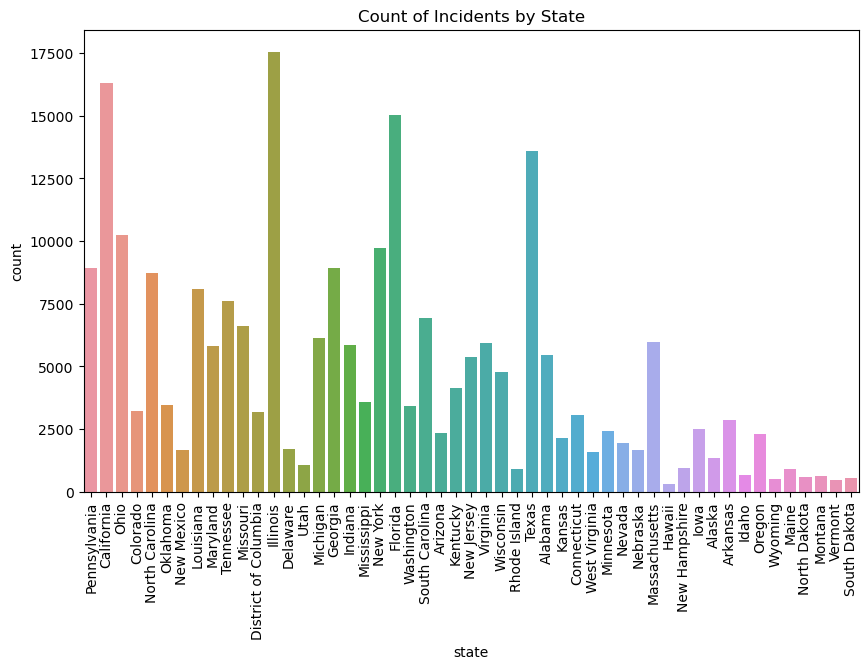

In [7]:
# Create Categorical Plot
plt.figure(figsize=(10, 6))
sns.countplot(data=gun_violence_df, x='state')
plt.xticks(rotation=90)
plt.title('Count of Incidents by State')
plt.show()

Geographical Correlation of Gun Violence: The count plot generated by the code displays the distribution of gun violence incidents across different states. By examining this plot, you can gain insights into whether certain states have a higher frequency of gun violence incidents compared to others. This can help you identify potential geographical correlations.

# Trends in gun violence incidents over the years

In [8]:
gun_violence_df['date'] = pd.to_datetime(gun_violence_df['date'])
gun_violence_df = gun_violence_df.assign(year = gun_violence_df['date'].map(lambda dates: dates.year))
gun_violence_df = gun_violence_df.assign(month =gun_violence_df['date'].map(lambda dates: dates.month))
gun_violence_df = gun_violence_df.assign(day = gun_violence_df['date'].map(lambda dates: dates.weekday()))

y_yrs = gun_violence_df.groupby('year')['incident_id'].count().values
x_yrs = gun_violence_df.groupby('year')['incident_id'].count().index.values

y_months = gun_violence_df.\
            groupby(by=['year','month']).\
            agg('count').\
            groupby('month')['incident_id'].\
            mean().\
            values

x_months = ['Jan','Feb','Mar','Apr','May','June','July','Aug','Sep','Oct','Nov','Dec']

y_days = gun_violence_df.\
            groupby(['year','day']).\
            agg('count').\
            groupby('day')['incident_id'].\
            mean().\
            values

x_days = ['Mon','Tues','Wed','Thurs','Fri','Sat','Sun']


trace1 = go.Bar(
    x=x_yrs,
    y=y_yrs
)
trace2 = go.Bar(
    x=x_months,
    y=y_months,
    xaxis='x2',
    yaxis='y2'
)
trace3 = go.Bar(
    x=x_days,
    y=y_days,
    xaxis='x3',
    yaxis='y3'
)

data = [trace1, trace2, trace3]
fig = plotly.tools.make_subplots(rows=3, cols=1, specs = [[{}], [{}],[{}]],vertical_spacing = 0.25, subplot_titles=('Number of Incidents per Year', 
                                                                 'Average Number of Incidents per Month over Years',
                                                                 'Average Number of Incidents per Day over Years'))

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 2, 1)
fig.append_trace(trace3, 3, 1)

fig['layout']['xaxis1'].update(title='Years')
fig['layout']['xaxis2'].update(title='Months')
fig['layout']['xaxis3'].update(title='Days')


fig['layout']['yaxis1'].update(title='Count')
fig['layout']['yaxis2'].update(title='Avg. Frequency')
fig['layout']['yaxis3'].update(title='Avg. Frequency')


fig['layout'].update(showlegend=False, height=800, width=800, title='Incidents Over Time')
iplot(fig)

C:\Users\patri\anaconda3\lib\site-packages\plotly\tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



Incidents per Year:
1. From 2014 to 2017, there appears to have been a general increase trend in the number of occurrences involving gun violence. 51,000 in the year 2014, to 61,000 in the year 2017
2. Since the data is only complete through March of 2018, which is only three months into 2018, there is not enough information to calculate the total number of occurrences that occurred in 2018. However, considering that the data only goes back three months, it is incredible that 12,000 occurrences have already been documented. 

Average Number of Incidents per Month Over the Years:
1. It would appear that the summer is the season in which the greatest number of occurrences take place, with the months of July and August having the largest total number of incidents. Both January and February had around 4,000 incidences of gun violence.

Average Number of Incidents per Day over Years:
1. The weekend is when the most instances take place, according to an observation made from above the plot. The frequency (in counts) of incidents that occurred on Sunday during the course of the years is 6000.

In [9]:
# Calculate the sum of killed and injured individuals for each date
n_killed = gun_violence_df.groupby('date')['n_killed'].sum(numeric_only=False).values
n_injured = gun_violence_df.groupby('date')['n_injured'].sum(numeric_only=False).values
dates = gun_violence_df.groupby('date').count().index

# Create traces for killed and injured individuals
trace1 = go.Scatter(
    x=dates,
    y=n_killed,
    name='Number Killed',
    line=dict(dash='dot')
)

trace2 = go.Scatter(
    x=dates,
    y=n_injured,
    name='Number Injured',
    line=dict(dash='dot')
)

# Combine traces into data list
data = [trace1, trace2]

# Define layout for the chart
layout = go.Layout(
    height=400,
    width=1000,
    title='Number of Total Incidents',
    xaxis=dict(title='Time'),
    yaxis=dict(title='Count')
)

# Create figure with data and layout
fig = go.Figure(data=data, layout=layout)

# Display the interactive plot
iplot(fig)

# Filter data for the year 2017
gun_violence_2017 = gun_violence_df[gun_violence_df['year'] == 2017]

# Calculate the sum of killed and injured individuals for each date in 2017
n_killed_2017 = gun_violence_2017.groupby('date')['n_killed'].sum(numeric_only=False).values
n_injured_2017 = gun_violence_2017.groupby('date')['n_injured'].sum(numeric_only=False).values
dates_2017 = gun_violence_2017.groupby('date').count().index


# Create traces for killed and injured individuals in 2017
trace1 = go.Scatter(
    x=dates_2017,
    y=n_killed_2017,
    name='Number Killed',
    line=dict(dash='dot')
)

trace2 = go.Scatter(
    x=dates_2017,
    y=n_injured_2017,
    name='Number Injured',
    line=dict(dash='dot')
)

# Combine traces into data list
data = [trace1, trace2]

# Define layout for the chart
layout = go.Layout(
    height=400,
    width=1000,
    title='Number of Incidents in 2017',
    xaxis=dict(title='Time'),
    yaxis=dict(title='Count')
)

# Create figure with data and layout
fig = go.Figure(data=data, layout=layout)

# Display the interactive plot
iplot(fig)

There are two time series plots visible up there. One that shows the overall number of occurrences that have taken place across all years, and another that shows the number of incidents that have taken place exclusively in 2017. It is clear from both sets of data that the number of people injured as a result of gun violence is significantly higher than the number of people who have lost their lives to such violence. In 2017, the oddity in the statistics is the mass shooting that occurred in Las Vegas, which resulted in the injuries of at least 500 people and possibly more.

# Define Hypotheses 

*1. <font color ='Green'>Hypothesis 1 </font> There is a correlation between the number of reported incidents and the population density of the location. This hypothesis is based on the idea that areas with higher population density might have more reported incidents due to increased interactions and potential conflicts.*

*2. <font color ='Green'>Hypothesis 2 </font>Incidents involving certain types of firearms (e.g., handguns, rifles) are more likely to result in fatalities compared to others.
This hypothesis could stem from your analysis of the types of guns used in incidents and their corresponding fatality rates.*


*3. <font color ='Green'>Hypothesis 3 </font> There is a seasonal trend in gun violence incidents, with higher occurrences during certain months of the year.*

*4. <font color ='Green'>Hypothesis 4 </font> States with more lenient gun control laws have higher rates of gun violence incidents.*

*5. <font color ='Green'>Hypothesis 5 </font>The age group of individuals involved in gun violence incidents differs between different incident types.*
